In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 1) Load data
df = pd.read_csv("n_liparteliani23_48213.csv")
print(df.head())
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# 2) Split features/label
X = df[["words", "links", "capital_words", "spam_word_count"]]
y = df["is_spam"]

# 3) Train/test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 4) Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5) Coefficients
print("\nIntercept:", model.intercept_[0])
for name, coef in zip(X.columns, model.coef_[0]):
    print(f"Coef({name}) = {coef}")

# 6) Validate
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)
print("Accuracy:", acc)


   words  links  capital_words  spam_word_count  is_spam
0    168      2              1                2        0
1    280      2              3                2        0
2    367      3              2                2        0
3    685      3             24               10        1
4    649      9              5                9        1
Shape: (2500, 5)
Columns: ['words', 'links', 'capital_words', 'spam_word_count', 'is_spam']

Intercept: -8.821537266184178
Coef(words) = 0.006640196452057729
Coef(links) = 0.8133056379062854
Coef(capital_words) = 0.4049848887926972
Coef(spam_word_count) = 0.7519649509922401

Confusion Matrix:
 [[366  13]
 [ 18 353]]
Accuracy: 0.9586666666666667


Visualization #1 — Class Distribution (Bar chart)

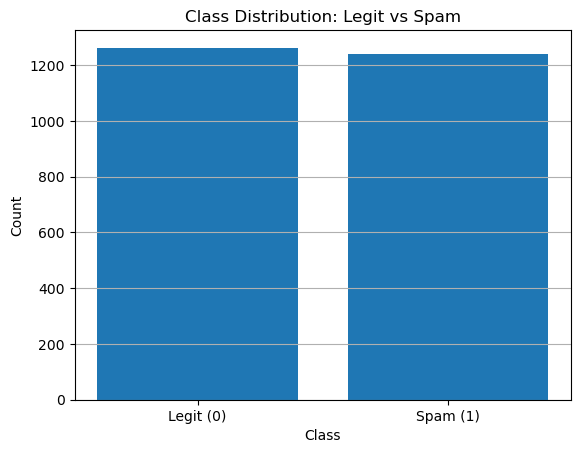

In [3]:
import matplotlib.pyplot as plt

counts = df["is_spam"].value_counts().sort_index()  # 0 then 1
plt.bar(["Legit (0)", "Spam (1)"], counts.values)
plt.title("Class Distribution: Legit vs Spam")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True, axis="y")
plt.show()


Visualization #2 — Confusion Matrix Heatmap (Matplotlib

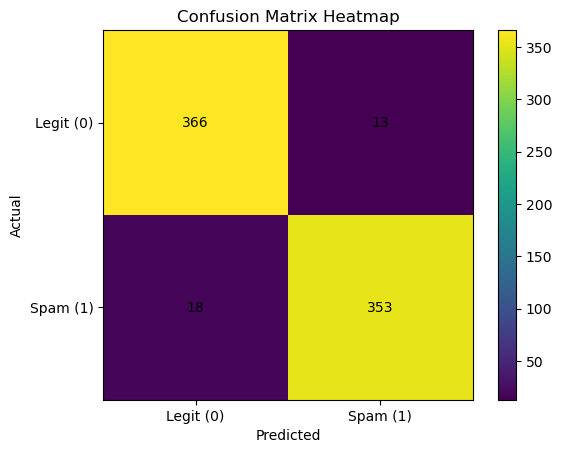

In [4]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# tick labels
plt.xticks([0,1], ["Legit (0)", "Spam (1)"])
plt.yticks([0,1], ["Legit (0)", "Spam (1)"])

# annotate cells
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")

plt.colorbar()
plt.show()


Class Distribution

The bar chart shows that the dataset is nearly balanced between legitimate (0) and spam (1) emails. This reduces the risk of bias toward one class and makes accuracy a meaningful metric.

Confusion Matrix Heatmap

Most samples fall on the diagonal, meaning the classifier correctly labels both classes. There are slightly more false negatives (spam predicted as legit = 18) than false positives (legit predicted as spam = 13), indicating the model is slightly more conservative in labeling spam.